In [1]:
import time
import pickle
import random
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import scipy.optimize as op

import copy

In [69]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def cost_function(theta, shapes, x, y):
    # Computes the cost function for all the training samples
    #theta = unflatten_thetas(thetas,shapes)
    theta = inflate_matrixes(theta, shapes)
    m = x.shape[0]
    h = feed_forward(theta, x)[-1]
    #total_cost = -(1 / m) * np.sum(
    #    (y * np.log(h).T) + ((1 - y) * np.log(1 - h).T)
    #)
    
    #return total_cost
    #calculate = (y * np.log(h).T) + ((1 - y) * np.log(1 - h).T)
    calculate = (y.dot(np.log(h).T)) + ((1 - y).dot(np.log(1 - h).T))
    print(np.sum(calculate) / (- m))
    return (np.sum(calculate) / (- m))

def feed_forward(thetas, X): #(60000, 784)
    a = [X]
    for i in range(len(thetas)):
        a.append(
            sigmoid(
                np.matmul(
                    np.hstack((
                        np.ones(len(X)).reshape(len(X), 1),
                        a[i]
                    )),
                    thetas[i].T
                )
            )
        )    
    return a;


def inflate_matrixes(flat_thetas, shapes):
    layers = len(shapes) + 1
    sizes = [shape[0] * shape[1] for shape in shapes]
    steps = np.zeros(layers, dtype=int)
    
    for i in range(layers - 1):
        steps[i + 1] = steps[i] + sizes[i]
        
    return [
        np.array(flat_thetas[steps[i]: steps[i + 1]]).reshape(*shapes[i])
        for i in range(layers - 1)
    ]
    

In [112]:
def jacobian(flat_thetas, shapes, X, Y):
    m, layers = len(X), len(shapes) + 1
    thetas = inflate_matrixes(flat_thetas, shapes)
    a = feed_forward(thetas, X)
    deltas = [*range(layers - 1), a[-1] - Y]
    
    #backward_prop
    #for i in range(layers - 2, 0, -1):
    
    #return flatten_list([
    #    ...
    #])
    
def backward_prop(thetas, shapes, X, Y):
    #thetas = unflatten_zetas(thetas,shapes)
    thetas = inflate_matrixes(thetas, shapes)
    m,_ = X.shape
    delta = copy.deepcopy(thetas)
    for i in delta: 
        i[:] = 0
    a = feed_forward(thetas, X)
    print("a", a[-1].shape)
    print("Y", Y.shape)
    first_delta = a[-1].T - Y.T
    deltas = [first_delta]
    #backward_prop
    print("1st delta:", first_delta.shape)
    print("Thetas", thetas[1].T[1:,:].shape)
    for i in reversed(range(1, len(thetas))):
        first_delta = np.multiply(
            np.matmul(thetas[i].T[1:,:], first_delta),
            np.multiply(a[i].T, (1-a[i].T))
            )
        deltas.append(first_delta)
    
    deltas = list(reversed(deltas))
    for i in range(len(delta)):
        temp_shape = a[i].T.shape
        print("i:", i)
        print("temp_shape:", temp_shape)
        print("AAAA:", a[i].T.shape)
        print("Deltas: ", deltas[i].shape)
        
        multi_res = np.matmul(
            deltas[i],
            np.vstack([np.ones((1,temp_shape[1])),a[i].T]).T
            )
        print("delta[i]", delta[i].shape)
        print("multires ",multi_res.shape)
        print("m", m)
        delta[i] += multi_res / m
    return flatten_thetas(delta)[0]
    


In [4]:
def flatten_list(thetas):
    flat = np.array([])
    for i in thetas:
        flat = np.append(flat, i.flatten())
    flat.flatten()
    return flat

def flatten_thetas(thetas):
    flat = np.asarray([])
    shapes = []
    for i in thetas:
        shapes.append(i.shape)
        flat = np.concatenate((flat,np.ravel(i)))
    return (flat,shapes)

#def unflatten_thetas(flat_thetas,shapes):
#    print(shapes)
#    print(flat_thetas[)    
#    res = []
#    for i in shapes:
#        cantidad = i[0] * i[1]  
#        res.append(flat_thetas[:cantidad].reshape(i))
#    return res 

In [5]:
hiddenNeurons = 500
outputNeurons = 10

In [6]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
m, n = X_train.shape
X_train.shape

(60000, 784)

In [7]:
X_train = X_train[0:10000]
y_train = y_train[0:10000]

In [8]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [9]:
X_train = X_train / 1000
X_test = X_test / 1000
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [10]:
norm = MinMaxScaler()

#X_train_scale = norm.fit_transform(X_train)
#X_test_scale = norm.fit_transfrom(X_test)

In [11]:
"""
theta_shapes = np.array([
    [hiddenNeurons, n + 1],
    [outputNeurons, hiddenNeurons + 1]
])
theta_shapes
"""
NETWORK_ARCHITECTURE = np.array([
    n,
    hiddenNeurons,
    outputNeurons
])

theta_shapes = np.hstack((
    NETWORK_ARCHITECTURE[1:].reshape(len(NETWORK_ARCHITECTURE) - 1, 1),
    (NETWORK_ARCHITECTURE[:-1] + 1).reshape(len(NETWORK_ARCHITECTURE) - 1, 1)
))
theta_shapes

array([[500, 785],
       [ 10, 501]])

In [12]:
flat_thetas = flatten_thetas([
    np.random.rand(*theta_shape)
    for theta_shape in theta_shapes
])
print(flat_thetas)
print(flat_thetas)

(array([0.03466611, 0.29030271, 0.74665859, ..., 0.94683174, 0.57998651,
       0.94064805]), [(500, 785), (10, 501)])
(array([0.03466611, 0.29030271, 0.74665859, ..., 0.94683174, 0.57998651,
       0.94064805]), [(500, 785), (10, 501)])


In [13]:
thetas = np.array(inflate_matrixes(
    flat_thetas[0],
    theta_shapes
))
thetas

array([array([[0.03466611, 0.29030271, 0.74665859, ..., 0.35173194, 0.21094509,
        0.14751982],
       [0.8707769 , 0.15851928, 0.53107921, ..., 0.49640353, 0.97598403,
        0.59978198],
       [0.53166215, 0.00461687, 0.0522756 , ..., 0.25316398, 0.56435317,
        0.27201789],
       ...,
       [0.29890861, 0.1050521 , 0.98988574, ..., 0.84356546, 0.13682648,
        0.67638518],
       [0.26817683, 0.93141799, 0.75002834, ..., 0.39535185, 0.25404762,
        0.1906432 ],
       [0.22850123, 0.45518169, 0.0329562 , ..., 0.08745933, 0.07954838,
        0.70231381]]),
       array([[0.46459725, 0.51737173, 0.1824083 , ..., 0.90305515, 0.27647889,
        0.74578445],
       [0.73298958, 0.81259516, 0.9816982 , ..., 0.15196674, 0.37267639,
        0.93857898],
       [0.98525051, 0.90272611, 0.41934027, ..., 0.10218397, 0.36942299,
        0.99936578],
       ...,
       [0.2220451 , 0.09089803, 0.1832009 , ..., 0.93324305, 0.76979151,
        0.1262904 ],
       [0.75391004, 

In [14]:
flat_thetas

(array([0.03466611, 0.29030271, 0.74665859, ..., 0.94683174, 0.57998651,
        0.94064805]),
 [(500, 785), (10, 501)])

In [15]:
# Predict
a = feed_forward(thetas, X_train)
a

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.99999943, 0.99999964, 0.99999944, ..., 0.99999954, 0.99999939,
         0.99999957],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 

## Example image that will be predicted

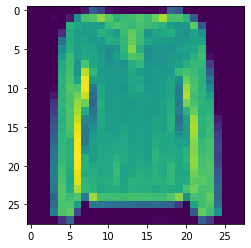

cat: 6


In [16]:
verificacion = plt.imshow(X_train[-1].reshape(28,28))
plt.show()
print("cat:", y_train[-1])

In [17]:
X_train.shape

(10000, 784)

In [18]:
Y_train.shape

(10000, 10)

In [19]:
print(np.array(flat_thetas[0]))
print(np.array(flat_thetas[0]).shape)

[0.03466611 0.29030271 0.74665859 ... 0.94683174 0.57998651 0.94064805]
(397510,)


In [113]:
res = op.minimize(
    fun=cost_function,
    x0=flat_thetas[0],
    args=(flat_thetas[1],X_train,Y_train),
    method='L-BFGS-B',
    jac=backward_prop,
    options={
        'disp':True,
        'maxiter':500
    }
)

e:\githubs\elements-of-machine-learning\venv_eml\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


nan
a (10000, 10)
Y (10000, 10)
1st delta: (10, 10000)
Thetas (500, 10)
i: 0
temp_shape: (784, 10000)
AAAA: (784, 10000)
Deltas:  (500, 10000)
delta[i] (500, 785)
multires  (500, 785)
m 10000
i: 1
temp_shape: (500, 10000)
AAAA: (500, 10000)
Deltas:  (10, 10000)
delta[i] (10, 501)
multires  (10, 501)
m 10000
nan
a (10000, 10)
Y (10000, 10)
1st delta: (10, 10000)
Thetas (500, 10)
i: 0
temp_shape: (784, 10000)
AAAA: (784, 10000)
Deltas:  (500, 10000)
delta[i] (500, 785)
multires  (500, 785)
m 10000
i: 1
temp_shape: (500, 10000)
AAAA: (500, 10000)
Deltas:  (10, 10000)
delta[i] (10, 501)
multires  (10, 501)
m 10000
nan
a (10000, 10)
Y (10000, 10)
1st delta: (10, 10000)
Thetas (500, 10)
i: 0
temp_shape: (784, 10000)
AAAA: (784, 10000)
Deltas:  (500, 10000)
delta[i] (500, 785)
multires  (500, 785)
m 10000
i: 1
temp_shape: (500, 10000)
AAAA: (500, 10000)
Deltas:  (10, 10000)
delta[i] (10, 501)
multires  (10, 501)
m 10000
nan
a (10000, 10)
Y (10000, 10)
1st delta: (10, 10000)
Thetas (500, 10)
i

In [114]:
res

      fun: 32504.691902601404
 hess_inv: <397510x397510 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.75340213e-07, -2.06285275e-22,  8.29007553e-16, ...,
       -8.71074559e-07,  1.52581549e-06, -1.57623424e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 23
   status: 0
  success: True
        x: array([0.03398292, 0.29030271, 0.74665859, ..., 0.43897984, 0.07210582,
       0.43280515])

In [115]:
with open('model.txt', 'wb') as f:
    pickle.dump(res, f)

In [120]:
new_thetas = inflate_matrixes(res.x,theta_shapes)
respuestas = feed_forward(new_thetas, X_test)
respuestas

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.99999998, 0.99999996, 0.99999996, ..., 0.99999996, 0.99999999,
         0.99999992],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [0.99999999, 0.99999998, 0.99999998, ..., 0.99999999, 0.99999998,
         0.99999997],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.99999776, 0.9999962 , 0.99999584, ..., 0.99999319, 0.99999732,
         0.9999958 ]]),
 array([[0.09419254, 0.1026778 , 0.10160488, ..., 0.10220572, 0.09901067,
         0.0999981 ],
        [0.09419253, 0.1026778 , 0.10160489, ..., 0.10220573, 0.

In [124]:
y_pred = np.asarray([np.argmax(i) for i in respuestas[-1].T])
y_pred

array([6428, 6428, 6428, 6428, 3234, 3234, 3234, 7324, 3234, 3234],
      dtype=int64)

In [125]:


def precision(y_pred, y):
    """Calcula la precisión del modelo con base
        a los valores reales y predichos de Y 
    """
    enconding = 0
    for i in range(len(y_pred)):
        valorMax = max(y_pred[i])
        valor = np.where(y_pred[i] == valorMax)
        if(valor[0][0] == y[i]):
            enconding += 1 
        
    return enconding / len(y)



In [128]:
print("La precisión obtenida para el conjunto de datos de ", precision(respuestas[-1], y_test)* 100, "%")

La precisión obtenida para el conjunto de datos de  10.0 %
